In [1]:
from cocpit.interpretability.plot import Plot
from cocpit import config as config
import torch
import os
import PIL

/home/vanessa/.local/lib/python3.9/site-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/cocpit/cocpit/interpretability/misc_funcs.py:228: RuntimeWarning: invalid value encountered in true_divide
  neg_saliency = np.maximum(0, -gradient) / -gradient.min()


predicted: wet


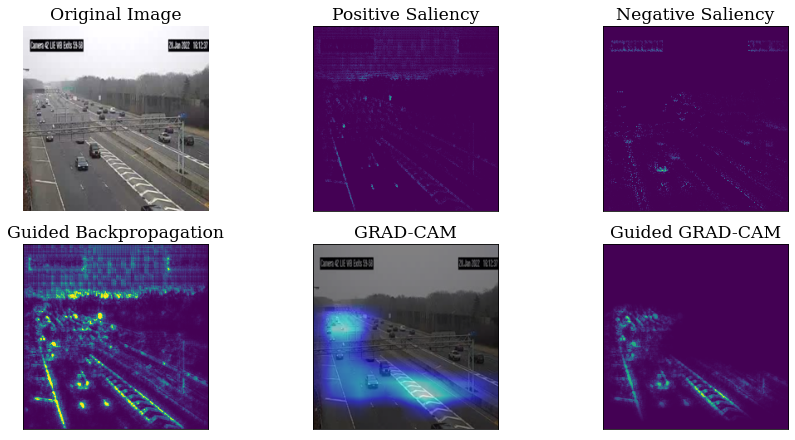

predicted: wet


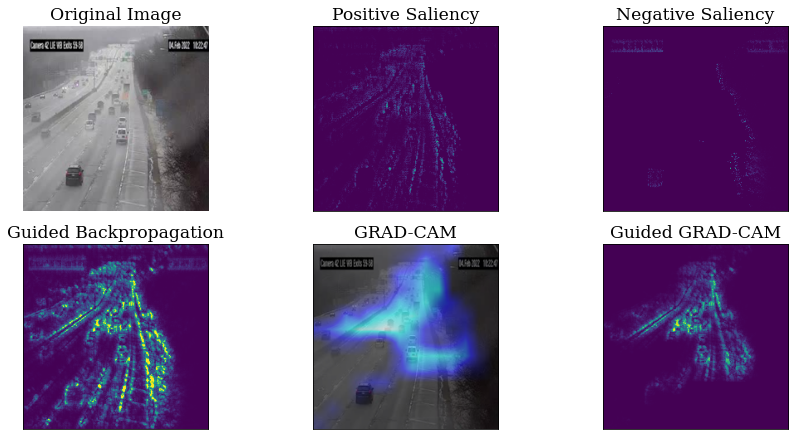

predicted: wet


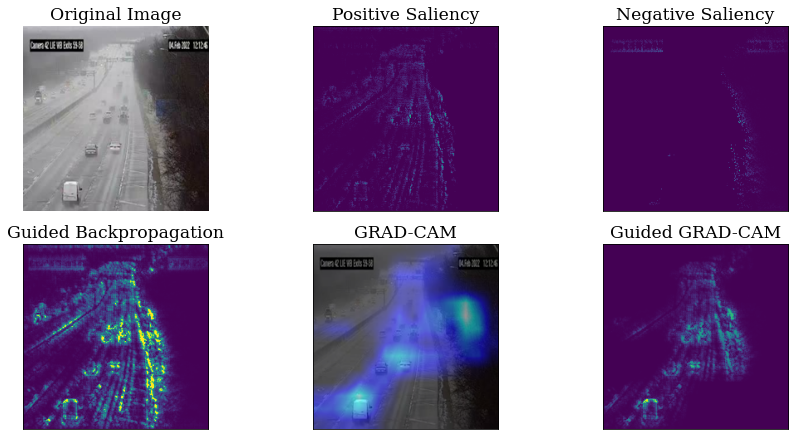

predicted: wet


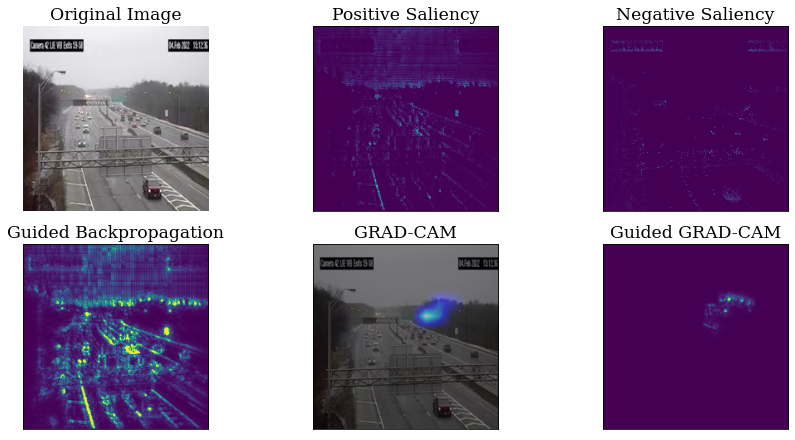

predicted: wet


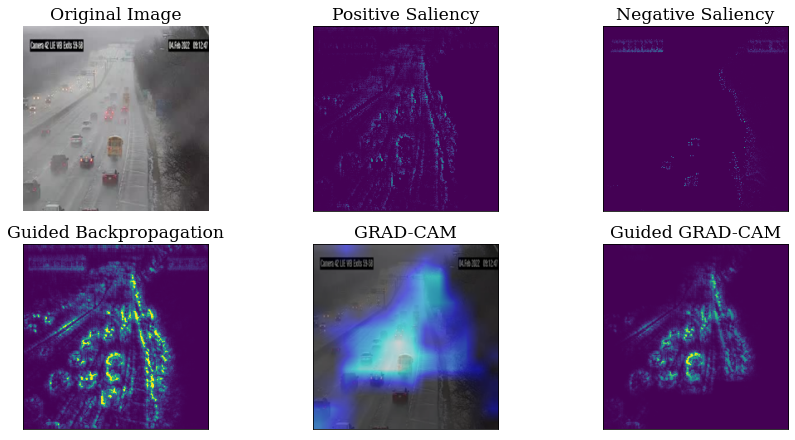

predicted: wet


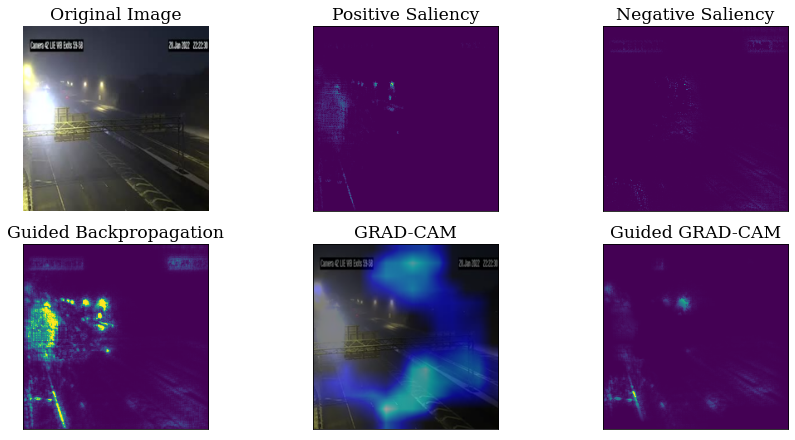

predicted: wet


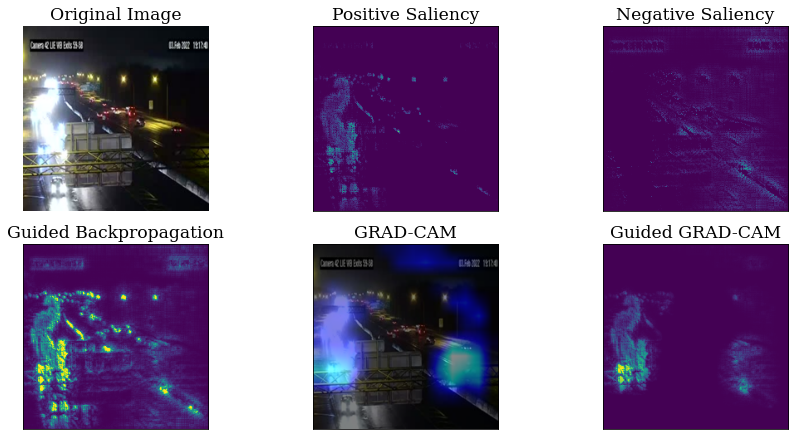

predicted: wet


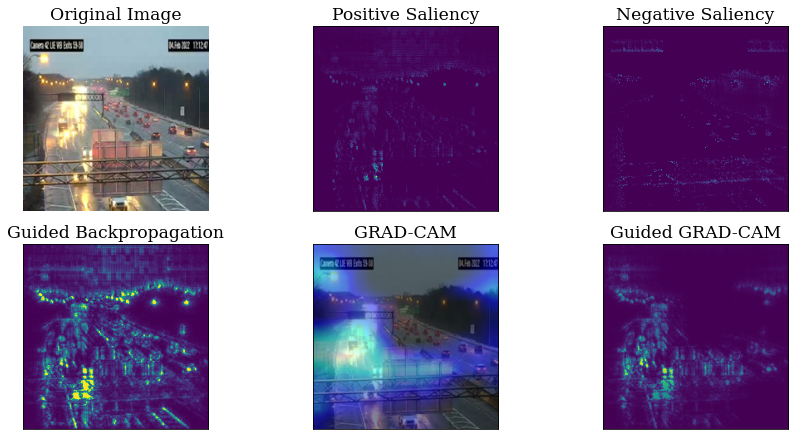

predicted: wet


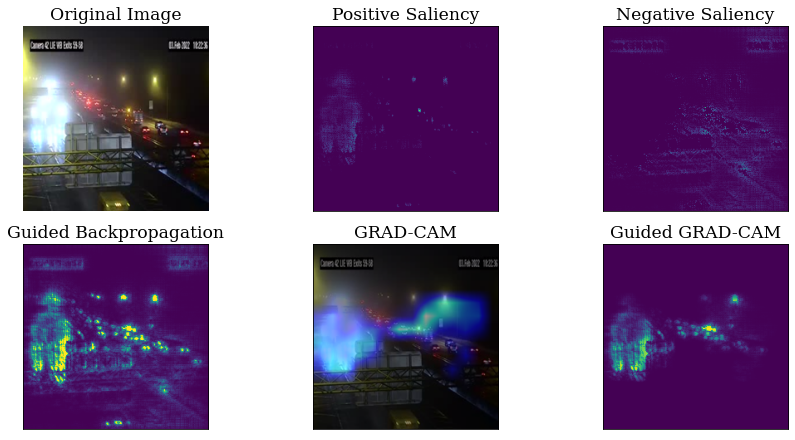

predicted: wet


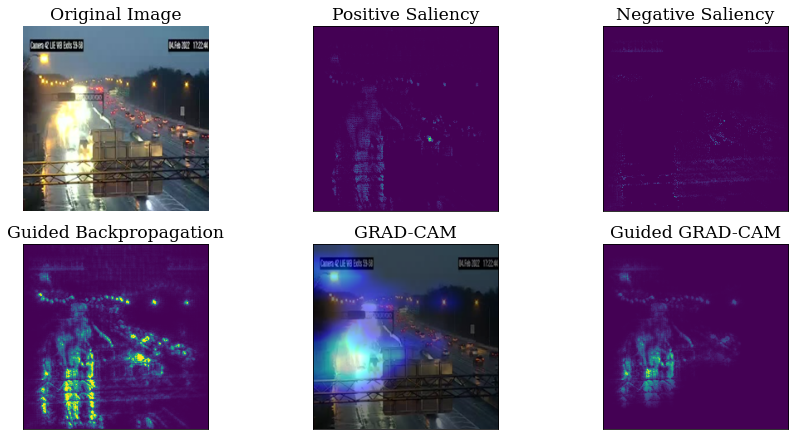

predicted: wet


KeyboardInterrupt: 

<Figure size 864x432 with 0 Axes>

In [2]:
model = torch.load(
    "/DRIVE_PYTORCH/saved_models/v0.0.0/e[25]_bs[64]_k0_1model(s).pt"
).to(config.DEVICE)
basedir = "/DRIVE/site_analysis/corridor_LIE_east/gui_label/Skyline_1878/wet/"
for image in os.listdir(basedir):
    image = PIL.Image.open(f"{basedir}/{image}").resize((224, 224))
    p = Plot(model, image)
    p.interp_runner(image)
    fig = p.make_plots()
    fig.show()
    fig.close()